Student Performance in Exams analysis:

Making necessary imports:

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

Reading data from csv file (exam_data.csv) into a pandas dataframe, df:

In [ ]:
df = pd.read_csv('/content/exam_data.csv')
df

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,male,group A,high school,standard,completed,67.0,67.0,63.0
1,female,group D,some high school,free/reduced,none,40.0,59.0,55.0
2,male,group E,some college,free/reduced,none,59.0,60.0,50.0
3,NaN,group B,high school,standard,none,77.0,78.0,68.0
4,NaN,group E,associate's degree,standard,completed,78.0,73.0,68.0
...,...,...,...,...,...,...,...,...
995,male,group C,high school,standard,none,73.0,NaN,65.0
996,male,group D,associate's degree,free/reduced,completed,85.0,91.0,92.0
997,female,group C,some high school,free/reduced,none,32.0,35.0,41.0
998,female,group C,some college,standard,none,73.0,74.0,82.0


Getting general information about the data, like count of null values in each column and datatype of each column:

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   gender                       943 non-null    object 
 1   race/ethnicity               946 non-null    object 
 2   parental level of education  967 non-null    object 
 3   lunch                        982 non-null    object 
 4   test preparation course      952 non-null    object 
 5   math score                   900 non-null    float64
 6   reading score                940 non-null    float64
 7   writing score                971 non-null    float64
dtypes: float64(3), object(5)
memory usage: 62.6+ KB


Getting statistical information about the numeric columns (math score, reading score, writing score) of the dataset:

In [ ]:
df.describe()

,math score,reading score,writing score
count,900.000000,940.000000,971.000000
mean,66.734444,69.072340,67.567456
std,15.467125,14.512493,15.571198
min,13.000000,27.000000,23.000000
25%,56.000000,60.000000,58.000000
50%,67.000000,69.000000,68.000000
75%,78.000000,79.000000,79.000000
max,100.000000,100.000000,100.000000


Getting count of null values and their ratio and storing it a dataframe, df_null:

In [ ]:
df_null = pd.DataFrame(df.isnull().sum(), columns = ["null values"])
df_null

,null values
gender,57
race/ethnicity,54
parental level of education,33
lunch,18
test preparation course,48
math score,100
reading score,60
writing score,29


In [ ]:
lst=[]

for i in df_null["null values"]:
  lst.append(i/len(df))
df_null["Ratio of null values to total values"]=lst
df_null

,null values,Ratio of null values to total values
gender,57,0.057
race/ethnicity,54,0.054
parental level of education,33,0.033
lunch,18,0.018
test preparation course,48,0.048
math score,100,0.100
reading score,60,0.060
writing score,29,0.029


Handling missing values in each column:

In [ ]:
df.gender.describe()

count      943
unique       2
top       male
freq       489
Name: gender, dtype: object

In [ ]:
df.gender.mode()

0    male
dtype: object

In [ ]:
df.gender.fillna('male', inplace = True)

In [ ]:
df['race/ethnicity'].describe()

count         946
unique          5
top       group C
freq          306
Name: race/ethnicity, dtype: object

In [ ]:
df['race/ethnicity'].fillna('geoup C', inplace = True)

In [ ]:
df = df.replace('geoup C','group C')

In [ ]:
df['parental level of education'].describe()

count              967
unique               6
top       some college
freq               215
Name: parental level of education, dtype: object

In [ ]:
df['parental level of education'].fillna('some college', inplace = True)

In [ ]:
df['lunch'].describe()

count          982
unique           2
top       standard
freq           644
Name: lunch, dtype: object

In [ ]:
df['lunch'].fillna('standard', inplace = True)

In [ ]:
df['test preparation course'].describe()

count      952
unique       2
top       none
freq       633
Name: test preparation course, dtype: object

In [ ]:
df['test preparation course'].fillna('none', inplace = True)

In [ ]:
df['math score'].describe()

count    900.000000
mean      66.734444
std       15.467125
min       13.000000
25%       56.000000
50%       67.000000
75%       78.000000
max      100.000000
Name: math score, dtype: float64

In [ ]:
df['math score'].fillna(67, inplace = True)

In [ ]:
df['reading score'].describe()

count    940.000000
mean      69.072340
std       14.512493
min       27.000000
25%       60.000000
50%       69.000000
75%       79.000000
max      100.000000
Name: reading score, dtype: float64

In [ ]:
df['reading score'].fillna(69, inplace = True)

In [ ]:
df['writing score'].describe()

count    971.000000
mean      67.567456
std       15.571198
min       23.000000
25%       58.000000
50%       68.000000
75%       79.000000
max      100.000000
Name: writing score, dtype: float64

In [ ]:
df['writing score'].fillna(68, inplace = True)

In [ ]:
df_null=pd.DataFrame(df.isnull().sum(),columns=["null values"])
df_null

,null values
gender,0
race/ethnicity,0
parental level of education,0
lunch,0
test preparation course,0
math score,0
reading score,0
writing score,0


Now, dataframe, df has no null values.

In [ ]:
df.rename(columns={'parental level of education': 'parent education'},inplace=True)

In [ ]:
df.head()

,gender,race/ethnicity,parent education,lunch,test preparation course,math score,reading score,writing score
0,male,group A,high school,standard,completed,67.0,67.0,63.0
1,female,group D,some high school,free/reduced,none,40.0,59.0,55.0
2,male,group E,some college,free/reduced,none,59.0,60.0,50.0
3,male,group B,high school,standard,none,77.0,78.0,68.0
4,male,group E,associate's degree,standard,completed,78.0,73.0,68.0


Dropping duplicate rows of dataframe, df:

In [ ]:
df[df.duplicated()]

,gender,race/ethnicity,parent education,lunch,test preparation course,math score,reading score,writing score
80,male,group D,some high school,standard,none,54.0,43.0,45.0
81,male,group D,some high school,standard,none,54.0,43.0,45.0
552,male,group D,some college,standard,none,83.0,68.0,65.0
553,male,group D,some college,standard,none,83.0,68.0,65.0
554,male,group D,some college,standard,none,83.0,68.0,65.0
825,male,group E,associate's degree,standard,completed,100.0,100.0,100.0
935,female,group C,master's degree,standard,none,70.0,64.0,65.0
936,female,group C,master's degree,standard,none,70.0,64.0,65.0


In [ ]:
df = df.drop_duplicates()

In [ ]:
df[df.duplicated()]

,gender,race/ethnicity,parent education,lunch,test preparation course,math score,reading score,writing score


Now, dataframe, df has no duplicate rows.

Now, visualizing each column of dataframe, df:

gender:

In [ ]:
fig1 = px.pie(df, values = df['gender'].value_counts().values, names = df['gender'].value_counts().index)
fig1.show()

parent education:

In [ ]:
fig2 = px.pie(df, values = df['parent education'].value_counts().values, names = df['parent education'].value_counts().index)
fig2.show()

race/ethnicity:

In [ ]:
fig3 = px.pie(df, values = df['race/ethnicity'].value_counts().values, names = df['race/ethnicity'].value_counts().index)
fig3.show()

lunch:

(This column stores data about the type of lunch, standard or free/reduced, consumed by each student)

In [ ]:
fig4 = px.pie(df, values = df['lunch'].value_counts().values, names = df['lunch'].value_counts().index)
fig4.show()

test preparation course:

(This column stores data about whether or not a student has completed the test preparation course for the exams)

In [ ]:
fig5 = px.pie(df, values = df['test preparation course'].value_counts().values, names = df['test preparation course'].value_counts().index)
fig5.show()

Visualization of numeric columns (math score, reading score, writing score):

math score:

In [ ]:
fig6 = px.histogram(df, x = "math score", marginal = 'box')
fig6.show()

reading score:

In [ ]:
fig7 = px.histogram(df, x="reading score", marginal = 'box')
fig7.show()

writing score:

In [ ]:
fig8 = px.histogram(df, x="writing score", marginal = 'box')
fig8.show()

**Obervation:**

Marks of all the 3 subjects have a left skewed distribution.

**Insights:**

1. There are very few students with very less marks.

2. Majority of the students have 60 to 80 marks in all the 3 subjects (math, reading and writing).

3. Modal marks in math are 66 - 67. Whereas, modal marks in reading and writing are 68 - 69.

Now, plotting scores of each subject against test preparation course.

math score vs test preparation course:

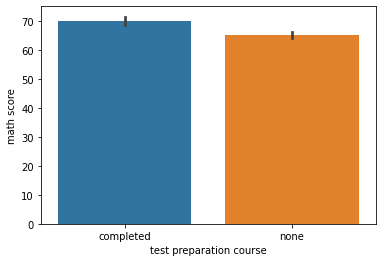

In [ ]:
sns.barplot(data = df, x="test preparation course", y="math score")
plt.show()

reading score vs test preparation course:

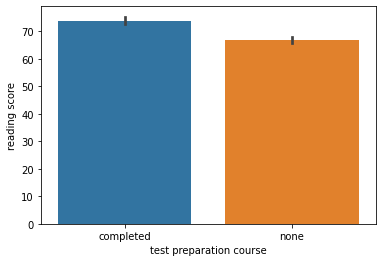

In [ ]:
sns.barplot(data = df, x="test preparation course", y="reading score")
plt.show()

writing score vs test preparation course:

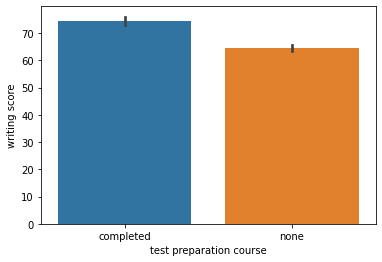

In [ ]:
sns.barplot(data = df, x="test preparation course", y="writing score")
plt.show()

**Insights:**

1. Students who have completed the test preparation course score on an average 70 marks in each subject.

2. Students who have not completed the test preparation course score on an average 65 marks in each subject.

Now, visualizing scores of each subject against test preparation course as well as comparing performace genderwise:

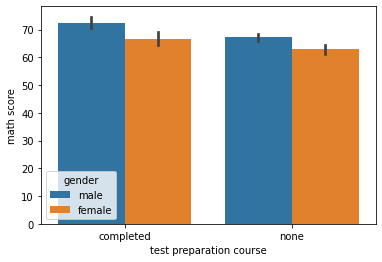

In [ ]:
sns.barplot(data=df, x="test preparation course", y="math score", hue="gender")
plt.show()

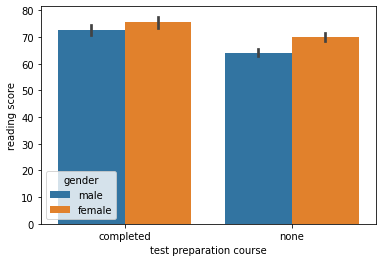

In [ ]:
sns.barplot(data=df, x="test preparation course", y="reading score", hue="gender")
plt.show()

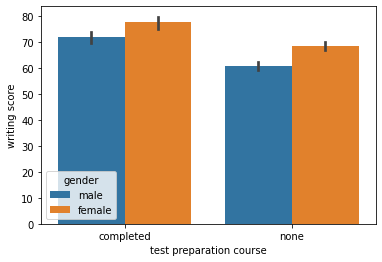

In [ ]:
sns.barplot(data=df, x="test preparation course", y="writing score", hue="gender")
plt.show()

**Insights:**

On an average:

1. Males perform better than females in math.

2. Females perform better than males in reading and writing.

irrespective of the completion of the test preparation course.

Visualizing marks of all three subjects (math, reading, writing) in form of a scatter plot:

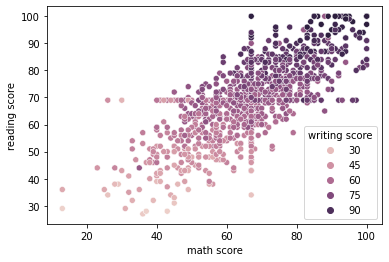

In [ ]:
sns.scatterplot(x = 'math score', y = 'reading score', hue ='writing score', data = df)

**Insights:**

Students performing well in one subject also perform well in remaining 2 subjects.

In [ ]:
df2 = df.groupby('race/ethnicity')
df2.first()

,gender,parent education,lunch,test preparation course,math score,reading score,writing score
race/ethnicity,,,,,,,
group A,male,high school,standard,completed,67.0,67.0,63.0
group B,male,high school,standard,none,77.0,78.0,68.0
group C,male,some college,free/reduced,none,47.0,42.0,45.0
group D,female,some high school,free/reduced,none,40.0,59.0,55.0
group E,male,some college,free/reduced,none,59.0,60.0,50.0


In [ ]:
df2 = df.groupby(['race/ethnicity']).mean()
df2

,math score,reading score,writing score
race/ethnicity,,,
group A,64.986301,68.095890,66.082192
group B,63.608247,67.108247,65.773196
group C,64.301676,67.312849,65.287709
group D,69.597561,72.056911,71.817073
group E,73.876033,72.198347,69.760331


In [ ]:
race = df['race/ethnicity'].unique()
race1 = sorted(race)
race1

['group A', 'group B', 'group C', 'group D', 'group E']

In [ ]:
df2['race/ethnicity'] = race1

In [ ]:
df2

,math score,reading score,writing score,race/ethnicity
race/ethnicity,,,,
group A,64.986301,68.095890,66.082192,group A
group B,63.608247,67.108247,65.773196,group B
group C,64.301676,67.312849,65.287709,group C
group D,69.597561,72.056911,71.817073,group D
group E,73.876033,72.198347,69.760331,group E


Visualization of scores against race/ethnicity:

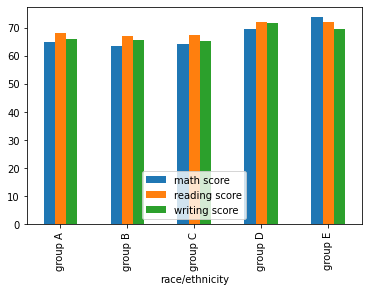

In [ ]:
df2.plot(x = "race/ethnicity", y=["math score", "reading score", "writing score"], kind="bar")

**Insights:**

1. Students of group D  and group E perform better than other groups.



In [ ]:
df3 = df.groupby(['parent education']).mean()
df3

,math score,reading score,writing score
parent education,,,
associate's degree,69.115578,70.608040,69.532663
bachelor's degree,71.847619,73.980952,74.542857
high school,65.128205,67.174359,64.538462
master's degree,70.666667,74.696970,75.045455
some college,66.110204,68.959184,67.253061
some high school,62.115385,64.873626,62.560440


In [ ]:
p_edu = df['parent education'].unique()
p_edu
p_edu_1 = sorted(p_edu)
p_edu_1

["associate's degree",
 "bachelor's degree",
 'high school',
 "master's degree",
 'some college',
 'some high school']

In [ ]:
df3['parent education'] = p_edu_1

In [ ]:
df3

,math score,reading score,writing score,parent education
parent education,,,,
associate's degree,69.115578,70.608040,69.532663,associate's degree
bachelor's degree,71.847619,73.980952,74.542857,bachelor's degree
high school,65.128205,67.174359,64.538462,high school
master's degree,70.666667,74.696970,75.045455,master's degree
some college,66.110204,68.959184,67.253061,some college
some high school,62.115385,64.873626,62.560440,some high school


Visualization of scores against parent education:

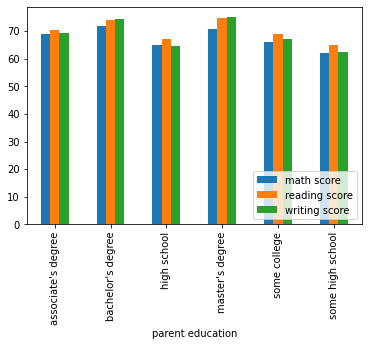

In [ ]:
df3.plot(x = "parent education", y=["math score", "reading score", "writing score"], kind="bar")
plt.legend( loc = 'lower right')
plt.show()

**Insights:**

Students whose parents have batchelor's or master's degree perform better than other students.

In [ ]:
df

,gender,race/ethnicity,parent education,lunch,test preparation course,math score,reading score,writing score
0,male,group A,high school,standard,completed,67.0,67.0,63.0
1,female,group D,some high school,free/reduced,none,40.0,59.0,55.0
2,male,group E,some college,free/reduced,none,59.0,60.0,50.0
3,male,group B,high school,standard,none,77.0,78.0,68.0
4,male,group E,associate's degree,standard,completed,78.0,73.0,68.0
...,...,...,...,...,...,...,...,...
995,male,group C,high school,standard,none,73.0,69.0,65.0
996,male,group D,associate's degree,free/reduced,completed,85.0,91.0,92.0
997,female,group C,some high school,free/reduced,none,32.0,35.0,41.0
998,female,group C,some college,standard,none,73.0,74.0,82.0


In [ ]:
df4 = df.groupby(['lunch']).mean()
df4

,math score,reading score,writing score
lunch,,,
free/reduced,59.307692,63.748521,60.967456
standard,70.516820,71.870031,71.036697


In [ ]:
lunch1 = df['lunch'].unique()
lunch2 = sorted(lunch1)
lunch2

['free/reduced', 'standard']

In [ ]:
df4['lunch'] = lunch2
df4

,math score,reading score,writing score,lunch
lunch,,,,
free/reduced,59.307692,63.748521,60.967456,free/reduced
standard,70.516820,71.870031,71.036697,standard


Visualization of scores against type of lunch:

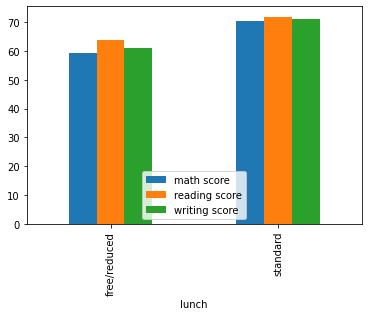

In [ ]:
df4.plot(x = "lunch", y=["math score", "reading score", "writing score"], kind="bar")

**Insights:**

Students getting better nutrition (standard lunch) perform better than students having free/reduced lunch.

In [ ]:
df.corr()

,math score,reading score,writing score
math score,1.000000,0.755477,0.764036
reading score,0.755477,1.000000,0.900748
writing score,0.764036,0.900748,1.000000


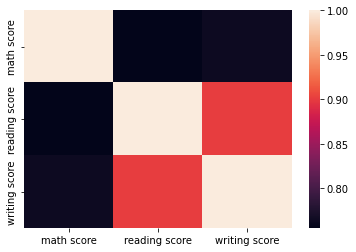

In [ ]:
sns.heatmap(df.corr())